Performing Single dim convolve, equiv to numpy convolve.
kernel is Even
numpy convolve and 1and2D convolve are equivilent


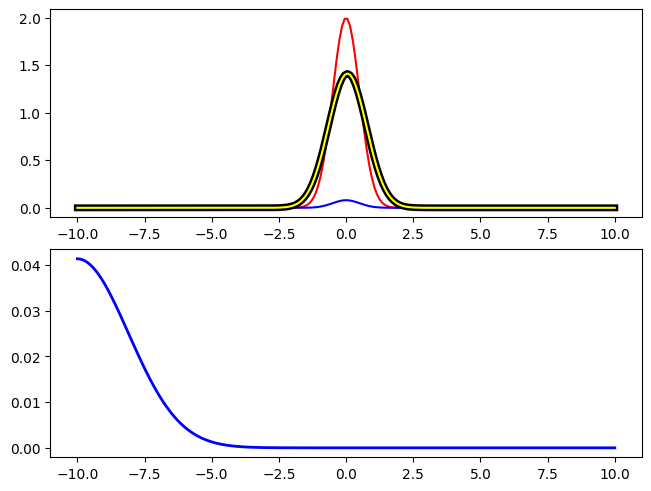

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import primaryConvolve as pc
from matplotlib.gridspec import GridSpec
import matplotlib.animation as animation

x = np.linspace(-10,10,200)

# Parameters for the Gaussian comb
A = 2       # Amplitude
d = 1      # Distance between peaks
sigmaDiv = 0.5 # Standard deviation (width) of each Gaussian
N = 2000       # Number of terms in the summation on each side of the center

def gaussianFunc(xAxis):

    return A * np.exp(-((xAxis)**2) / (2 * sigmaDiv**2))

def normalization(array,x):
    
    return array/sum(array)

signalGaussian = gaussianFunc(x) # mock data of a signal function
kernelGaussian = normalization(gaussianFunc(x),x) # Used in simple convolutions where the gaussian is non changing in x or "energy"

### Recreation of the the comb test except without using the sigma function from the ELBE data ###

convovledOutput = pc.convolution_1and2D(signalGaussian, kernelGaussian, "same" )
numpyConvolve = np.convolve(signalGaussian,kernelGaussian,mode="same")

if np.array_equal(convovledOutput, numpyConvolve) == True:
    print("numpy convolve and 1and2D convolve are equivilent")
elif np.array_equal(convovledOutput, numpyConvolve) != True:
    print("numpy convolve and 1and2D convolve are NOT equivilent")

fig = plt.figure(layout="constrained")
gs = GridSpec(2,2, figure = fig)
ax1 = fig.add_subplot(gs[0,0:])

ax1.plot(x, signalGaussian, color = "red")
ax1.plot(x, kernelGaussian, color = "blue")
ax1.plot(x,convovledOutput,color = "black",linewidth = 5)
ax1.plot(x,numpyConvolve,color="yellow")


### End of simple convolve ###

### Begin of dependant convolve ###

# Recreation of gaussian matrix function from dataPull.py
def matrixGaussianFunc(xArray,inputFunc):
    matrixGaussian = []
    for xPoint in xArray:
        matrixGaussian.append(inputFunc(xPoint,xArray))
    matrixGaussian = np.array(matrixGaussian)
    return matrixGaussian

def sigmaFunction(xPoint):
    A = 2
    B = 0.01
    return(A + B * xPoint)

def gaussianFuncChangingX(xPoint, xArray):

    gaussian = A * np.exp(-((xArray - xPoint)**2) / (2 * sigmaFunction(xPoint)**2))

    return gaussian / sum(gaussian)
changingKernelGaussMatrix = matrixGaussianFunc(x, gaussianFuncChangingX)


ax2 = fig.add_subplot(gs[1,0:])
line, = ax2.plot(x, changingKernelGaussMatrix[0], color='blue', linewidth=2)

def update(frame):
    line.set_ydata(changingKernelGaussMatrix[frame])  # Update the function plot
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(changingKernelGaussMatrix), interval=100, blit=True)

plt.show()
